# **Homework 7: From Data To Model**

In this homework we will focus on going from the data to a model that generalizes well.

## Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras import regularizers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Part 1: Warmup
We will first start off again with the california housing dataset

In [2]:
california_housing = fetch_california_housing(return_X_y=True, as_frame=True)
X = california_housing[0]
y = california_housing[1]
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

In general: the code for each question will go as follows:


```
def question():
  model = tf.keras.Sequential([
    layer 1, layer 2, ..., layer n
  ])
  model.compile(optimizer=optimizer you want to use, loss=loss you want to use)
  return model
```


```
model = question()
model.fit(X,y, epochs=however many you want, batch_size=however large you want)
```


Note that most optimizers in tf.keras.optimizers take the learning rate as a parameter. The docs on all the optimizers are here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

For the losses, the docs for them are here: https://www.tensorflow.org/api_docs/python/tf/keras/losses




<font color="#de3023"><h6><b>Question 1 (9 pts):
Recreate the regression model created in HW5 using tf.keras.Sequential. While you will have to use the same amount of epochs and batch size, for the optimizer you can use RMSprop with the same learning rate as in HW3.</b></h6></font>



In [3]:
def q1():
  model = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="mse"
  )
  return model

epochs = 100
batch_size = 1000
model_q1 = q1()
history_q1 = model_q1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size) #take your model and train it here

Epoch 1/100
15/15 [==============================] - 8s 6ms/step - loss: 5.2805
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 4.3859
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 3.7218
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 3.1492
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 2.6531
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 2.2337
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 1.8803
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 1.5930
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 1.3715
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2083
Epoch 11/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0914
Epoch 12/100
15/15 [==============================] - 0s 6ms/step - loss: 1.0076
Epoch 13/100
15/15 [=================

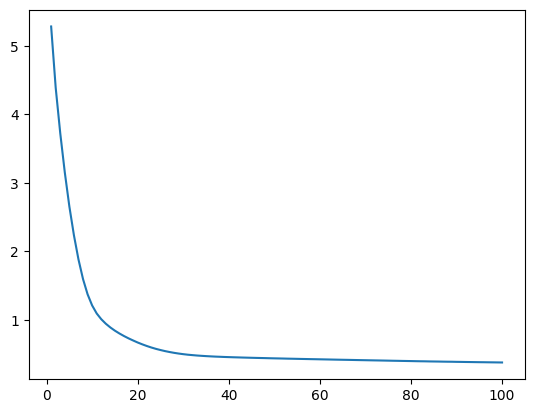

In [4]:
val_loss = history_q1.history["loss"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

# Part 2: MNIST to Model
Now we shall switch to the MNIST dataset

In [5]:
(X, y_int), _ = mnist.load_data()
X = X.reshape(X.shape[0],-1)
y_one_hot = to_categorical(y_int, num_classes=10)
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.3, random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

11490434/11490434 [==============================] - 0s 0us/step


The rest of the homework will focus on the model selection aspect of creating machine learning models. We will ask you to create many different models and then choose which is best. This is meant to mimic how machine learning problems are tackled in real life.

<font color="#de3023"><h6><b>For Questions 2 through 10, in the compile() call please use the loss="categorical_crossentropy" and metrics=["categorical_crossentropy"]. An example:</b></h6></font>


```
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"])
```
<font color="#de3023"><h6><b>The loss curves we make for you will not work if you do not use cross entropy as a loss and metric.</b></h6></font>


<font color="#de3023"><h6><b>Question 2 (9 pts):
Create a model that underfits the data after at least 50 epochs. You can create whatever model you like and you can play around with any hyperparameters (how many layers, size of layers, epochs, batch_size, learning rate, etc.)</b></h6></font>

In [6]:
def q2():
  model = tf.keras.Sequential([
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [7]:
batch_size_q2 = 850
epochs_q2 = 70
model_q2 = q2()
# print(X_train.shape)
# print(y_train.shape)
history_q2 = model_q2.fit(X_train,y_train, epochs=epochs_q2,
                          batch_size=batch_size_q2,
                          validation_data=(X_valid, y_valid))


Epoch 1/70
40/40 [==============================] - 1s 16ms/step - loss: 1.0939 - categorical_crossentropy: 1.0939 - val_loss: 0.6287 - val_categorical_crossentropy: 0.6287
Epoch 2/70
40/40 [==============================] - 0s 7ms/step - loss: 0.5012 - categorical_crossentropy: 0.5012 - val_loss: 0.4465 - val_categorical_crossentropy: 0.4465
Epoch 3/70
40/40 [==============================] - 0s 6ms/step - loss: 0.3864 - categorical_crossentropy: 0.3864 - val_loss: 0.3850 - val_categorical_crossentropy: 0.3850
Epoch 4/70
40/40 [==============================] - 0s 6ms/step - loss: 0.3405 - categorical_crossentropy: 0.3405 - val_loss: 0.3595 - val_categorical_crossentropy: 0.3595
Epoch 5/70
40/40 [==============================] - 0s 5ms/step - loss: 0.3161 - categorical_crossentropy: 0.3161 - val_loss: 0.3470 - val_categorical_crossentropy: 0.3470
Epoch 6/70
40/40 [==============================] - 0s 5ms/step - loss: 0.3008 - categorical_crossentropy: 0.3008 - val_loss: 0.3382 - val_

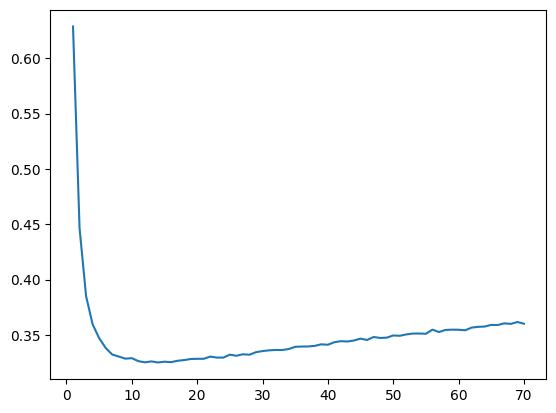

In [8]:
val_loss = history_q2.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

<font color="#de3023"><h6><b> Question 3 (9 pts):
Take the model from question 2 and change it/tweak hyperparameters until it is able to overfit the data. (The resulting model does not need to be similar to the answer in question 2.)</b></h6></font>

In [9]:
def q3():
  model = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [10]:
batch_size_q3 = 850
epochs_q3 = 50
model_q3 = q3()
history_q3 = model_q3.fit(X_train,y_train, epochs=epochs_q3,
                          batch_size=batch_size_q3,
                          validation_data=(X_valid, y_valid))

Epoch 1/50
40/40 [==============================] - 1s 11ms/step - loss: 0.5871 - categorical_crossentropy: 0.5871 - val_loss: 0.2792 - val_categorical_crossentropy: 0.2792
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2016 - categorical_crossentropy: 0.2016 - val_loss: 0.1990 - val_categorical_crossentropy: 0.1990
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1365 - categorical_crossentropy: 0.1365 - val_loss: 0.1684 - val_categorical_crossentropy: 0.1684
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1009 - categorical_crossentropy: 0.1009 - val_loss: 0.1576 - val_categorical_crossentropy: 0.1576
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0785 - categorical_crossentropy: 0.0785 - val_loss: 0.1440 - val_categorical_crossentropy: 0.1440
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.0607 - categorical_crossentropy: 0.0607 - val_loss: 0.1397 - val_

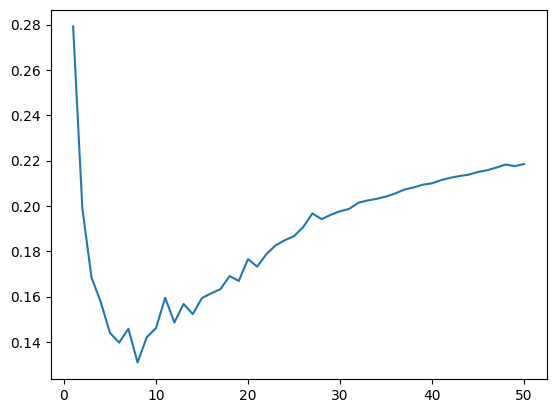

In [11]:
val_loss = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

<font color="#de3023"><h6><b>Question 4 (9 pts):
From your model in question 3, what do you think is the best stopping point? Note your answer below and why you think it. Then, Use keras early stopping on your model from question 3 to have keras automatically do it for you. Keep everything else the same.</b></h6></font>

I think a good stopping point is at epoch 6, because it is the first point before it suddenly peak.

In [12]:
model_q4 = q3()
monitor = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=1e-3, patience=5,
    verbose=1, mode='auto', restore_best_weights=True)
#create early stopping callback here
history_q4 = model_q4.fit(X_train, y_train,
                          validation_data=(X_test, y_test),
                          callbacks=[monitor],
                          batch_size=batch_size_q3,
                          epochs=epochs_q3)
#train model_q4 here



Epoch 1/50
40/40 [==============================] - 1s 14ms/step - loss: 0.5688 - categorical_crossentropy: 0.5688 - val_loss: 0.2680 - val_categorical_crossentropy: 0.2680
Epoch 2/50
40/40 [==============================] - 0s 7ms/step - loss: 0.2046 - categorical_crossentropy: 0.2046 - val_loss: 0.2023 - val_categorical_crossentropy: 0.2023
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 0.1428 - categorical_crossentropy: 0.1428 - val_loss: 0.1721 - val_categorical_crossentropy: 0.1721
Epoch 4/50
40/40 [==============================] - 0s 9ms/step - loss: 0.1062 - categorical_crossentropy: 0.1062 - val_loss: 0.1608 - val_categorical_crossentropy: 0.1608
Epoch 5/50
40/40 [==============================] - 0s 9ms/step - loss: 0.0832 - categorical_crossentropy: 0.0832 - val_loss: 0.1551 - val_categorical_crossentropy: 0.1551
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0644 - categorical_crossentropy: 0.0644 - val_loss: 0.1507 - val_

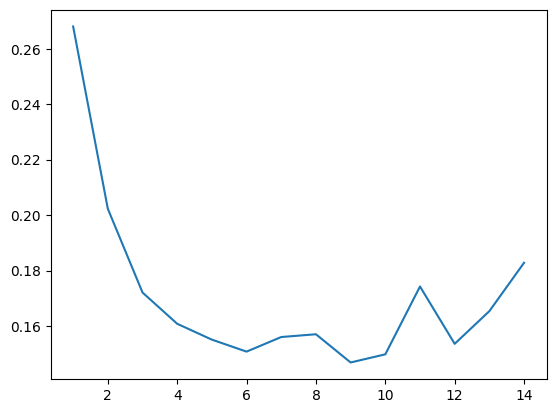

In [13]:
val_loss = history_q4.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss)+1),val_loss)

<font color="#de3023"><h6><b>Question 5 (9 pts):
Starting with your model from question 3, try to regularize it by reducing size of network. State the changes made and the hyperparameter tuning you went through to settle on your model along with a brief explanation why these choices were made.</b></h6></font>

Change the two layers with 256 networks to two layers with 64 and 16 networks. The batch_size and epochs stay the same

In [14]:
def q5():
  model = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [15]:
batch_size_q5 = 850
epochs_q5 = 50
model_q5 = q5()
history_q5 = model_q5.fit(X_train,y_train, epochs=epochs_q5,
                          batch_size=batch_size_q5,
                          validation_data=(X_valid, y_valid))

Epoch 1/50
40/40 [==============================] - 1s 12ms/step - loss: 0.9024 - categorical_crossentropy: 0.9024 - val_loss: 0.4296 - val_categorical_crossentropy: 0.4296
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3211 - categorical_crossentropy: 0.3211 - val_loss: 0.2825 - val_categorical_crossentropy: 0.2825
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.2192 - categorical_crossentropy: 0.2192 - val_loss: 0.2286 - val_categorical_crossentropy: 0.2286
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1704 - categorical_crossentropy: 0.1704 - val_loss: 0.2059 - val_categorical_crossentropy: 0.2059
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1424 - categorical_crossentropy: 0.1424 - val_loss: 0.1857 - val_categorical_crossentropy: 0.1857
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1218 - categorical_crossentropy: 0.1218 - val_loss: 0.1802 - val_

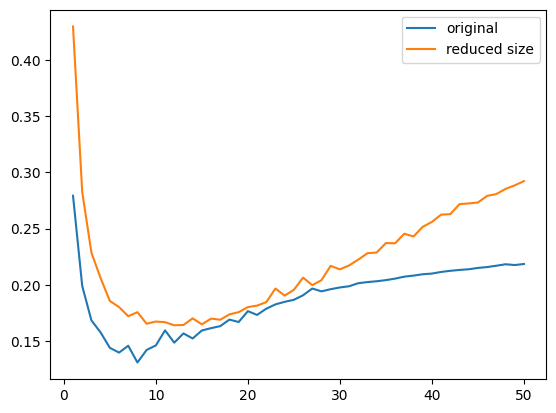

In [16]:
val_loss_q5 = history_q5.history["val_categorical_crossentropy"]
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
plt.plot(np.arange(1,len(val_loss_q5)+1),val_loss_q5, label="reduced size")
plt.legend()

<font color="#de3023"><h6><b>Question 6 (9 pts):
Starting with your model from question 3, try to regularize it by using by L1 regularization. State the changes made and the hyperparameter tuning you went through to settle on your model along with a brief explanation why these choices were made.</b></h6></font>

I used the L1 regularization while keeping the batch size and epoch the same, as I want to compare the results when hyperparameter between the model is similar.

In [17]:
def q6():
  model = tf.keras.Sequential([
    layers.Dense(128, activation="relu",
                 kernel_regularizer = regularizers.l1(0.01)),
    layers.Dense(128, activation="relu",
                 kernel_regularizer = regularizers.l1(0.01)),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [18]:
batch_size_q6 = 850
epochs_q6 = 50
model_q6 = q6()
history_q6 = model_q6.fit(X_train,y_train, epochs=epochs_q6,
                          batch_size=batch_size_q6,
                          validation_data=(X_valid, y_valid))

Epoch 1/50
40/40 [==============================] - 1s 11ms/step - loss: 30.5684 - categorical_crossentropy: 1.5101 - val_loss: 14.9370 - val_categorical_crossentropy: 1.1060
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 8.3186 - categorical_crossentropy: 0.9326 - val_loss: 4.5842 - val_categorical_crossentropy: 0.8104
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 3.4093 - categorical_crossentropy: 0.7111 - val_loss: 2.4733 - val_categorical_crossentropy: 0.6509
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 2.1059 - categorical_crossentropy: 0.5931 - val_loss: 1.9478 - val_categorical_crossentropy: 0.5699
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 1.8755 - categorical_crossentropy: 0.5323 - val_loss: 1.8320 - val_categorical_crossentropy: 0.5258
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 1.7809 - categorical_crossentropy: 0.4976 - val_loss: 1.7585 - va

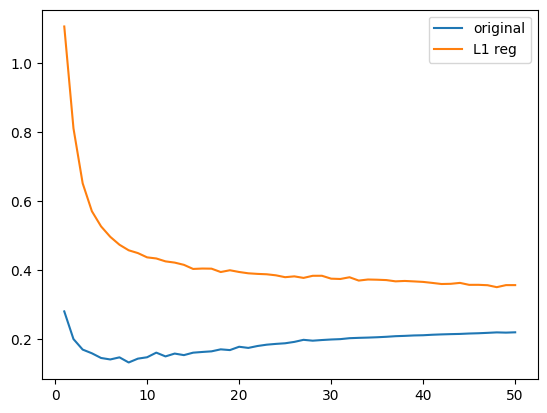

In [19]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q6 = history_q6.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q6)+1),val_loss_q6, label="L1 reg")
plt.legend()

<font color="#de3023"><h6><b>Question 7 (9 pts):
Starting with your model from question 3, try to regularize it by using L2 regularization. State the changes made and the hyperparameter tuning you went through to settle on your model along with a brief explanation why these choices were made.</b></h6></font>

I used the L2 regularization while keeping the batch size and epoch the same, as I want to compare the results when hyperparameter between the model is similar.

In [20]:
def q7():
  model = tf.keras.Sequential([
    layers.Dense(128, activation="relu",
                 kernel_regularizer = regularizers.l2(0.01)),
    layers.Dense(128, activation="relu",
                 kernel_regularizer = regularizers.l2(0.01)),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [21]:
batch_size_q7 = 850
epochs_q7 = 50
model_q7 = q7()
history_q7 = model_q7.fit(X_train,y_train, epochs=epochs_q7,
                          batch_size=batch_size_q7,
                          validation_data=(X_valid, y_valid))

Epoch 1/50
40/40 [==============================] - 1s 11ms/step - loss: 3.0627 - categorical_crossentropy: 0.6060 - val_loss: 1.9513 - val_categorical_crossentropy: 0.3270
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 1.3966 - categorical_crossentropy: 0.2560 - val_loss: 1.0072 - val_categorical_crossentropy: 0.2585
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.7677 - categorical_crossentropy: 0.2140 - val_loss: 0.6236 - val_categorical_crossentropy: 0.2242
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.5182 - categorical_crossentropy: 0.1937 - val_loss: 0.4802 - val_categorical_crossentropy: 0.2157
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 0.4152 - categorical_crossentropy: 0.1809 - val_loss: 0.4123 - val_categorical_crossentropy: 0.2018
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.3660 - categorical_crossentropy: 0.1685 - val_loss: 0.3760 - val_

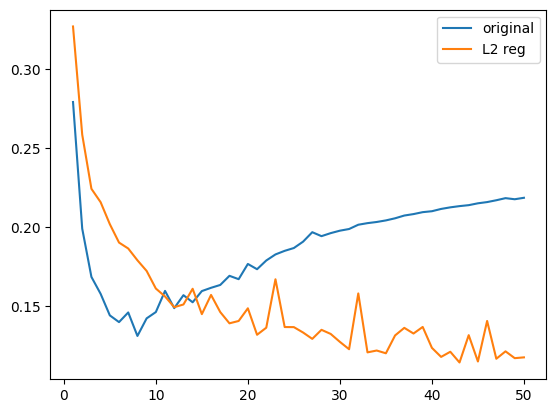

In [22]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q7 = history_q7.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q7)+1),val_loss_q7, label="L2 reg")
plt.legend()

<font color="#de3023"><h6><b>Question 8 (9 pts):
Starting with your model from question 3, try to regularize it by using dropout. State the changes made and the hyperparameter tuning you went through to settle on your model along with a brief explanation why these choices were made.</b></h6></font>

I used the dropout method while keeping the batch size and epoch the same, as I want to compare the results when hyperparameter between the model is similar.

In [23]:
def q8():
  model = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [24]:
batch_size_q8 = 850
epochs_q8 = 50
model_q8 = q8()
history_q8 = model_q8.fit(X_train,y_train, epochs=epochs_q8,
                          batch_size=batch_size_q8,
                          validation_data=(X_valid, y_valid))

Epoch 1/50
40/40 [==============================] - 2s 12ms/step - loss: 1.2578 - categorical_crossentropy: 1.2578 - val_loss: 0.4201 - val_categorical_crossentropy: 0.4201
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.6439 - categorical_crossentropy: 0.6439 - val_loss: 0.3245 - val_categorical_crossentropy: 0.3245
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 0.5163 - categorical_crossentropy: 0.5163 - val_loss: 0.2878 - val_categorical_crossentropy: 0.2878
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.4481 - categorical_crossentropy: 0.4481 - val_loss: 0.2646 - val_categorical_crossentropy: 0.2646
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.4085 - categorical_crossentropy: 0.4085 - val_loss: 0.2482 - val_categorical_crossentropy: 0.2482
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3672 - categorical_crossentropy: 0.3672 - val_loss: 0.2332 - val_

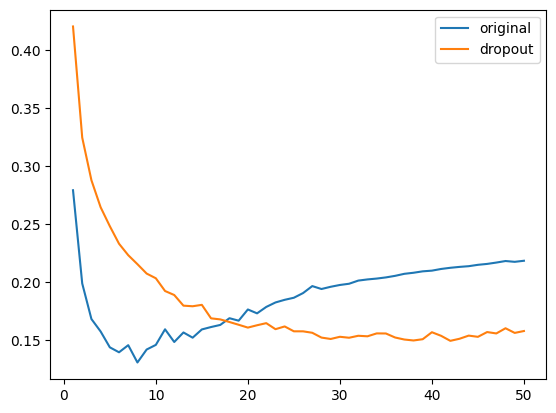

In [25]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q8 = history_q8.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q8)+1),val_loss_q8, label="dropout")
plt.legend()

<font color="#de3023"><h6><b>Question 9 (9 pts):
Starting with your model from question 3, try to regularize it by using a combination of the methods used in questions 5-8. Make changes to hyperparameters and have the model stop at a good epoch. State the changes made and the hyperparameter tuning you went through to settle on your model along with a brief explanation why these choices were made.</b></h6></font>

I used the L2 regularization instead of L1, as L1 regularization did not seems promising. I also lower the learning rate for L2 regularization. I also use lower the network size, two dropout layers, and earlyStopping with the same parameter from q4.
I keep the batch size and epoch the same, as I want to compare the results when hyperparameter between the model is similar.

In [26]:
def q9():
  model = tf.keras.Sequential([
    layers.Dense(128, activation="relu",
                 kernel_regularizer = regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.001),
                     loss="categorical_crossentropy",
                     metrics=["categorical_crossentropy"]
  )
  return model

In [27]:
batch_size_q9 = 850
epochs_q9 = 50
model_q9 = q9()
es = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=1e-3,
    patience=5, verbose=1, mode='auto',
    restore_best_weights=True)
history_q9 = model_q9.fit(X_train,y_train, epochs=epochs_q9,
                          batch_size=batch_size_q9,
                          validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/50
40/40 [==============================] - 1s 12ms/step - loss: 1.4620 - categorical_crossentropy: 1.4401 - val_loss: 0.5162 - val_categorical_crossentropy: 0.4943
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.7951 - categorical_crossentropy: 0.7733 - val_loss: 0.3779 - val_categorical_crossentropy: 0.3561
Epoch 3/50
40/40 [==============================] - 0s 7ms/step - loss: 0.6370 - categorical_crossentropy: 0.6153 - val_loss: 0.3285 - val_categorical_crossentropy: 0.3069
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 0.5549 - categorical_crossentropy: 0.5334 - val_loss: 0.3047 - val_categorical_crossentropy: 0.2833
Epoch 5/50
40/40 [==============================] - 0s 7ms/step - loss: 0.5033 - categorical_crossentropy: 0.4820 - val_loss: 0.2831 - val_categorical_crossentropy: 0.2618
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.4662 - categorical_crossentropy: 0.4450 - val_loss: 0.2680 - val_

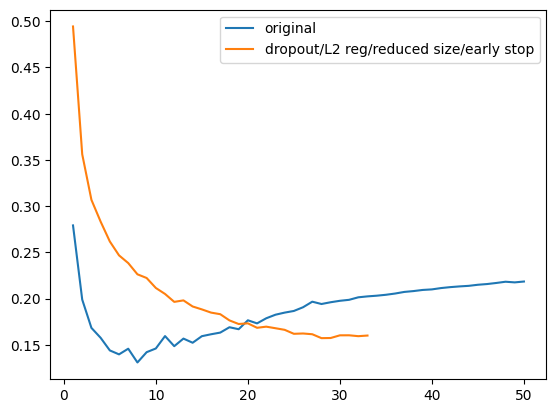

In [28]:
val_loss_q3 = history_q3.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q3)+1),val_loss_q3, label="original")
val_loss_q9 = history_q9.history["val_categorical_crossentropy"]
plt.plot(np.arange(1,len(val_loss_q9)+1),val_loss_q9, label="dropout/L2 reg/reduced size/early stop")
plt.legend()

<font color="#de3023"><h6><b>Question 10 (9 pts):
Take the models from question 2 to 9 and find their test loss. Hint: for a given model, model.evaluate() could be a useful function</b></h6></font>

In [29]:
#your code here
q2_tl = model_q2.evaluate(X_test, y_test)
print("Test loss for q2 (underfit) is : ", q2_tl[0])
q3_tl = model_q3.evaluate(X_test, y_test)
print("Test loss for q3 (overfit) is : ", q3_tl[0])
q4_tl = model_q4.evaluate(X_test, y_test)
print("Test loss for q4 (earlyStopping) is : ", q4_tl[0])
q5_tl = model_q5.evaluate(X_test, y_test)
print("Test loss for q5 (reduce size) is : ", q5_tl[0])
q6_tl = model_q6.evaluate(X_test, y_test)
print("Test loss for q6 (regularizer l1) is : ", q6_tl[0])
q7_tl = model_q7.evaluate(X_test, y_test)
print("Test loss for q7 (regularizer l2) is : ", q7_tl[0])
q8_tl = model_q8.evaluate(X_test, y_test)
print("Test loss for q8 (dropout) is : ", q8_tl[0])
q9_tl = model_q9.evaluate(X_test, y_test)
print("Test loss for q9 (mix from q5 to q8) is : ", q9_tl[0])

563/563 [==============================] - 1s 2ms/step - loss: 0.3433 - categorical_crossentropy: 0.3433
Test loss for q2 (underfit) is :  0.3433239161968231
563/563 [==============================] - 1s 3ms/step - loss: 0.2321 - categorical_crossentropy: 0.2321
Test loss for q3 (overfit) is :  0.23211808502674103
563/563 [==============================] - 2s 3ms/step - loss: 0.1468 - categorical_crossentropy: 0.1468
Test loss for q4 (earlyStopping) is :  0.14682981371879578
563/563 [==============================] - 1s 2ms/step - loss: 0.2989 - categorical_crossentropy: 0.2989
Test loss for q5 (reduce size) is :  0.29891154170036316
563/563 [==============================] - 1s 3ms/step - loss: 1.2794 - categorical_crossentropy: 0.3498
Test loss for q6 (regularizer l1) is :  1.2793855667114258
563/563 [==============================] - 1s 2ms/step - loss: 0.2209 - categorical_crossentropy: 0.1208
Test loss for q7 (regularizer l2) is :  0.2208506017923355
563/563 [=====================

<font color="#de3023"><h6><b>Question 11 (10 pts): If you had to use one of these models, which one would you use and why?</b></h6></font>

I would take model from q9, as it has various techniques and regularizers put in it to stop overfitting, which means it can fit and compile more complex data in the future. It is also because choosing the least test data is not always wise and choosing the middle model will be better for future operation.